In [1]:
%matplotlib inline

Plot features in adata.obsm
===========================

This example shows how to use `squidpy.pl.extract` to plot features in
`anndata.AnnData.obsm`.

:::{seealso}

    See {doc}`examples/image/compute_summary_features` for
    computing an example of such features.
:::


In [3]:
import squidpy as sq

adata = sq.datasets.slideseqv2()
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In this dataset, we have saved deconvolution results in
`anndata.AnnData.obsm` and we would like to plot them with
`squidpy.pl.spatial_scatter`.


In [4]:
adata.obsm["deconvolution_results"].head(10)

,Interneurons,Subiculum_Entorhinal_cl2,Subiculum_Entorhinal_cl3,DentatePyramids,CA1_CA2_CA3_Subiculum,Mural,Astrocytes,Oligodendrocytes,Polydendrocytes,Microglia,Ependymal,Endothelial_Tip,Neurogenesis,Endothelial_Stalk,barcode,max_cell_type,maxval,thresh_ct
AACGTCATAATCGT,0.113249,0.203010,0.086060,0.247319,0.153769,0.002455,0.072134,0.022327,0.008712,0.065562,0.003853,0.000000,0.000000,0.021550,AACGTCATAATCGT,4,0.247319,0.000000
TACTTTAGCGCAGT,0.055718,0.077973,0.048517,0.187755,0.195889,0.040198,0.126317,0.071605,0.052353,0.013668,0.016075,0.044060,0.012159,0.057714,TACTTTAGCGCAGT,5,0.195889,0.000000
CATGCCTGGGTTCG,0.108751,0.228845,0.109581,0.246070,0.115723,0.006306,0.071186,0.015768,0.000000,0.059735,0.000000,0.013702,0.000000,0.024332,CATGCCTGGGTTCG,4,0.246070,0.000000
TCGATATGGCACAA,0.108163,0.029694,0.112905,0.172960,0.122573,0.014295,0.065901,0.031834,0.096153,0.034155,0.094124,0.065322,0.011114,0.040808,TCGATATGGCACAA,4,0.172960,0.000000
TTATCTGACGAAGC,0.065790,0.236463,0.012458,0.233441,0.145091,0.014810,0.097935,0.052590,0.023642,0.008578,0.014275,0.058715,0.000000,0.036213,TTATCTGACGAAGC,2,0.236463,0.000000
GATGCGACTCCTCG,0.000000,0.000000,0.000000,0.222606,0.705572,0.042319,0.009459,0.000000,0.002753,0.009457,0.000000,0.000000,0.004932,0.002902,GATGCGACTCCTCG,5,0.705572,0.705572
ACGGATGTTCCGAT,0.000000,0.000000,0.000000,0.037305,0.078873,0.014507,0.032262,0.500225,0.099139,0.147571,0.013209,0.023574,0.010208,0.043127,ACGGATGTTCCGAT,8,0.500225,0.500225
TCTCATGGGTGGGA,0.011898,0.000000,0.000000,0.114613,0.089905,0.010118,0.411598,0.188769,0.034367,0.059139,0.000000,0.029453,0.017615,0.032526,TCTCATGGGTGGGA,7,0.411598,0.411598
ACCGGAACTTCTTC,0.016862,0.000000,0.000000,0.017110,0.070573,0.017013,0.006445,0.091637,0.034633,0.022682,0.659986,0.029675,0.009862,0.023523,ACCGGAACTTCTTC,11,0.659986,0.659986
ACAGGGTTTATCGA,0.012235,0.000000,0.010678,0.138919,0.723275,0.026109,0.029469,0.003275,0.003829,0.011391,0.011063,0.000000,0.014785,0.014970,ACAGGGTTTATCGA,5,0.723275,0.723275


Squidpy provides an easy wrapper that creates a temporary copy of the
feature matrix and pass it to `anndata.AnnData.obs`.


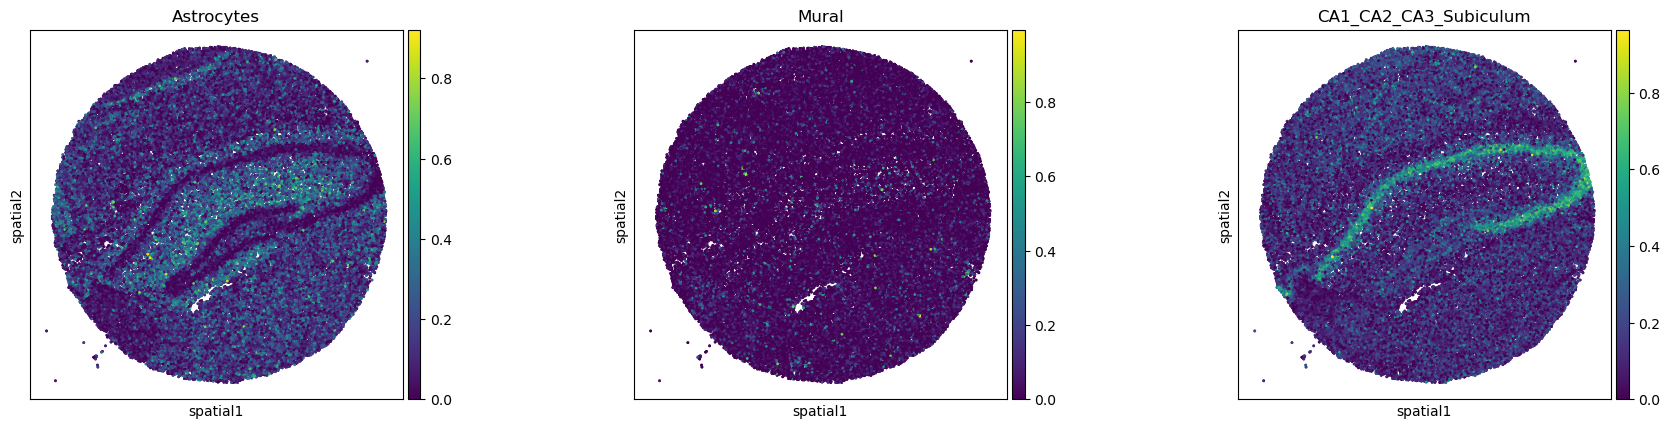

In [5]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "deconvolution_results"),
    shape=None,
    color=["Astrocytes", "Mural", "CA1_CA2_CA3_Subiculum"],
    size=4,
)